In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_path = "./data"

In [3]:
train = pd.read_csv(f'{data_path}/train.csv',sep=",",header=0)
test = pd.read_csv(f'{data_path}/test.csv',sep=",",header=0)
IDtest = test['PassengerId']

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [6]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [7]:
len(train.Age.unique())

89

In [8]:
train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [9]:
train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [10]:
len(train.Fare.unique())

248

In [11]:
from collections import Counter
# 异常值检测，将训练集中的异常值去除
features = ["Age","SibSp","Parch","Fare"]
n = 2
outlier_indices = []
for col in features:
    Q1 = np.percentile(train[col],25) # 25%分位点
    Q3 = np.percentile(train[col],75) # 75%分位点
    IQR = Q3 - Q1 # 四分位点距离(Interquartile range)
    outlier_step = 1.5 * IQR # 离群值
    # 为特征cl确定离群点的索引列表
    outlier_index = train[(train[col] < Q1 - outlier_step) | 
                          (train[col] > Q3 + outlier_step)].index
    outlier_indices.extend(outlier_index)
print(outlier_indices)
# 选择包含n个以上的离群值的观测值
outlier_indices = Counter(outlier_indices) # 计数
print(outlier_indices)
multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )


[7, 16, 24, 27, 50, 59, 63, 68, 71, 85, 88, 119, 159, 164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787, 792, 813, 819, 824, 846, 850, 863, 7, 8, 10, 13, 16, 24, 25, 27, 43, 50, 54, 58, 59, 63, 65, 68, 71, 78, 86, 88, 93, 97, 98, 102, 118, 119, 124, 128, 136, 140, 145, 147, 148, 153, 155, 159, 160, 164, 165, 166, 167, 171, 172, 175, 176, 180, 182, 183, 184, 188, 193, 197, 201, 205, 229, 233, 237, 247, 248, 251, 254, 255, 259, 261, 262, 266, 268, 272, 273, 278, 279, 297, 299, 305, 311, 312, 314, 318, 319, 323, 324, 328, 329, 332, 340, 341, 348, 352, 356, 360, 362, 374, 377, 381, 386, 390, 394, 407, 409, 416, 417, 419, 423, 424, 435, 436, 437, 438, 440, 445, 446, 448, 450, 469, 472, 479, 480, 485, 489, 498, 506, 523, 529, 530, 532, 533, 535, 539, 540, 541, 542, 548, 549, 550, 558, 567, 580, 581, 585, 587, 593, 595, 600, 608, 610, 615, 616, 618, 622, 634, 637, 638, 642, 644, 651, 657, 659, 670, 678, 679, 683, 6

+ 离群值对预测结果有很大影响，尤其是regression problem，从而需要处理离群值
+ 使用Tukey方法检测离群值，离群值界限定义为分布值(IQR)的第一和第三四分位数之间的四分位数范围。离群值是在(IQR + an outlier step)之外具有特征值的行。

+ 从数值型变量中检测离群值，将至少在两个特征变量中都被标记为离群值的样本称为异常值。。

In [12]:
train.loc[multiple_outliers]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


+ 总共有10个异常值，其中28,89和342乘客有较高的船票费用。
+ 其他7个是有较高的SibSp，同时他们都有nan情况。

In [13]:
print(multiple_outliers)

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [14]:
# 删除异常值
train = train.drop(multiple_outliers,axis=0).reset_index(drop=True)
'''
不可用
train.drop(multiple_outliers,axis=0,inplace=True).reset_index(drop=True)
因为设置inplace=True,从而该结果得到的是None，当得到None进行reset_index，则会报错。
'''

'\n不可用\ntrain.drop(multiple_outliers,axis=0,inplace=True).reset_index(drop=True)\n因为设置inplace=True,从而该结果得到的是None，当得到None进行reset_index，则会报错。\n'

In [15]:
# 将训练集和测试集拼接
train_len = len(train)
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

将训练集和测试集一起进行特征工程，是为了让分类特征包含在整个特征变量空间中

In [16]:
# 检查缺失值和null情况
dateset = dataset.fillna(np.nan)
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

+ Cabin和Age缺失值最多
+ Survived变量有418列空值，正式对应于test数据集要预测的标签。

In [17]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  881 non-null    int64  
 1   Survived     881 non-null    int64  
 2   Pclass       881 non-null    int64  
 3   Name         881 non-null    object 
 4   Sex          881 non-null    object 
 5   Age          711 non-null    float64
 6   SibSp        881 non-null    int64  
 7   Parch        881 non-null    int64  
 8   Ticket       881 non-null    object 
 9   Fare         881 non-null    float64
 10  Cabin        201 non-null    object 
 11  Embarked     879 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [18]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,881.000000,881.000000,881.000000,711.000000,881.000000,881.000000,881.000000
mean,446.713961,0.385925,2.307605,29.731603,0.455165,0.363224,31.121566
std,256.617021,0.487090,0.835055,14.547835,0.871571,0.791839,47.996249
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.000000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


### 特征分析

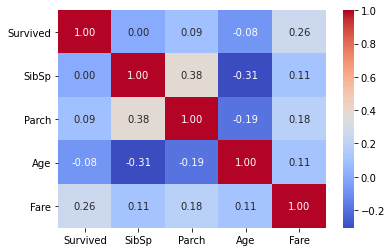

In [19]:
import seaborn as sns
# 数值型特征的相关性
g = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(),
                annot=True, fmt = ".2f", cmap = "coolwarm")

+ 只要Fare与Survived相关性较高一点。
+ 但这并不表明其他特征变量没有用。这些特征中的子集可以与存活率相关。为了确定这一点，我们需要详细研究这些功能。

SibSp

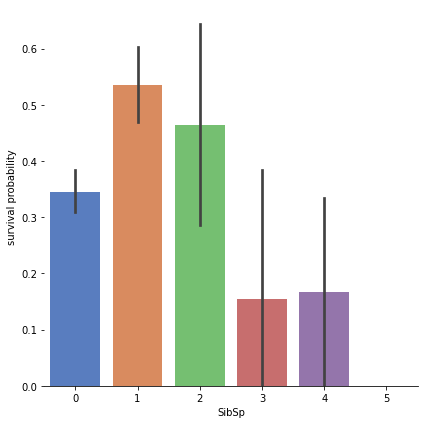

In [20]:
# 查看sibsp特征与Survived的关系
g = sns.factorplot(x="SibSp",y="Survived",data=train,
                   kind="bar", size = 6 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

+ 乘客似乎有很多兄弟姐妹/配偶生存的机会少了
+ 兄弟姐妹/配偶单一的乘客(0 SibSP)或与其他两人(SibSP 1或2)有更多生存机会
+ 根据这个现象可以考虑一个新特性描述这些类别(见功能工程)

Parch

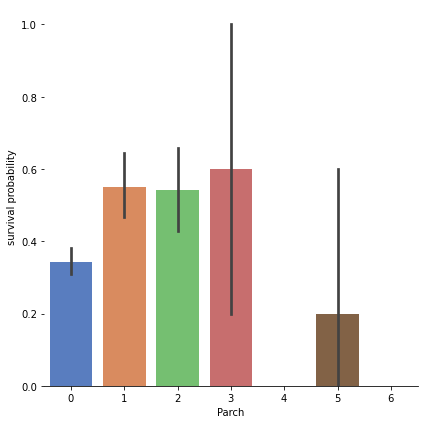

In [21]:
# 查看parch特征与Survived的关系
g = sns.factorplot(x="Parch",y="Survived",data=train,
                  kind="bar",size=6,palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

小家庭比单亲家庭(Parch 0)、中等家庭(Parch 3、4)和大家庭(Parch 5、6)有更多机会存活

三人家庭的乘客的存活率存在一个重要的标准差

Age

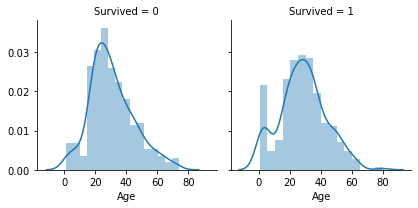

In [22]:
# 探究Age与Survived的关系
g = sns.FacetGrid(train,col="Survived")
g = g.map(sns.distplot,"Age")

年龄分布有点像高斯分布

注意，存活和未存活的年龄分布是不一样的，存活乘客中有一个高峰对应于年轻乘客。60-80岁之间的乘客存活率更低。

因此，即是Age和Survived没有关联，但我们看到，年龄段的分布与是否存活是有关系的。

图中表明，年轻乘客更优机会存活。

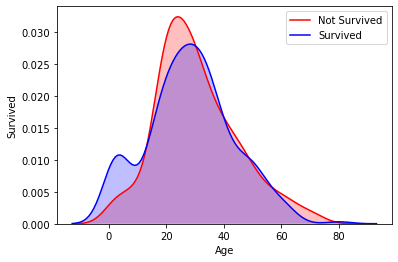

In [23]:
# 继续探究Age与Survived的关系
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], 
                color="Red", shade = True)

g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], 
                ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Survived")
g = g.legend(['Not Survived',"Survived"])

从这可以看到，0-5岁的儿童存活是有一个峰值的。

Fare

In [24]:
dataset['Fare'].isnull().sum()

1

In [25]:
dateset[dataset['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [26]:
# 缺失数据的乘客类型为3，那就用Pclass=3的费用填充把。
fareFill =  np.round(dataset.loc[dataset['Pclass']==3,"Fare"].mean(),2)

In [27]:
dataset['Fare'] = dataset['Fare'].fillna(fareFill)

In [28]:
dataset['Fare'].isnull().sum()

0

当然，因为Fare仅有一个缺失值，直接用中值填充应该也没有太大影响。

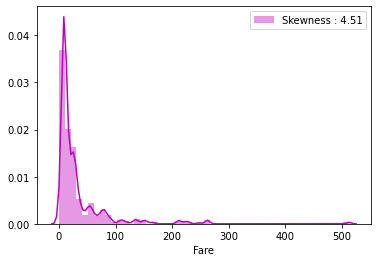

In [29]:
# 查看Fare分布
g = sns.distplot(dataset["Fare"], color="m", 
                 label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

从图中可以看出，Fare分布非常不正态，可能会导致模型中的值过大。

而这边为了让图形变得更加正态，使用log变换。

In [30]:
# log变换
dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

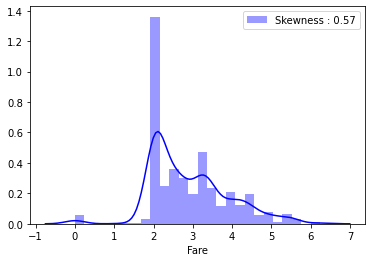

In [31]:
g = sns.distplot(dataset["Fare"], color="b", 
                 label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

经过对数变换后，偏度明显减小

Categorical values

Sex

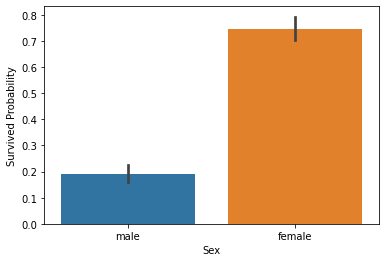

In [32]:
g = sns.barplot(x="Sex",y="Survived",data=train)
g = g.set_ylabel("Survived Probability")

In [33]:
train[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


+ 很明显，Male比Female的存活率更低
+ 从中可以看出，sex应该在预测有扮演一个重要角色。
+ Titanic号的存活守则：Women and children first.

Pclass

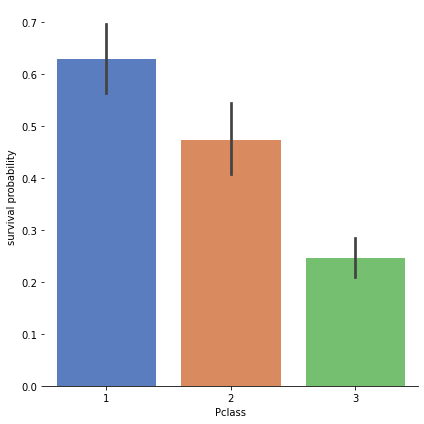

In [34]:
# 探究pclass 和 survived关系
g = sns.factorplot(x="Pclass",y="Survived",data=train,kind="bar",
                  size=6,palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

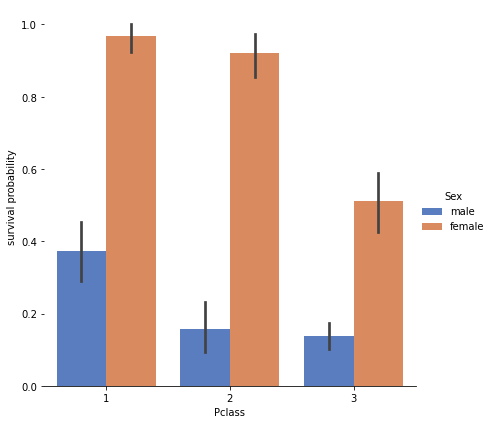

In [35]:
# 从sex角度，查看Pclass和Survived关系
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

不同乘客类型的存活率并不一样。似乎Pclass=1的存活率比Pclass=2和Pclass=3的存活率更高

男性乘客的存活率，在Pclass=1的存活率比Pclass=2和Pclass=3的存活率更好，女性也一样。

Embarked

In [36]:
dataset["Embarked"].isnull().sum()

2

In [37]:
dataset['Embarked'].value_counts()

S    904
C    270
Q    123
Name: Embarked, dtype: int64

In [38]:
# 因S最多，所以就直接用S填充缺失值
dataset["Embarked"] = dataset["Embarked"].fillna("S")

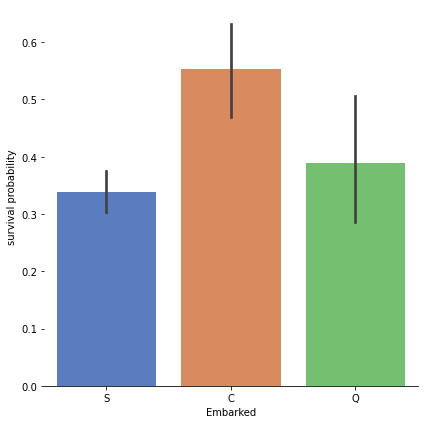

In [39]:
# 探究Embarked和Survived的关系
g = sns.factorplot(x="Embarked", y="Survived",  data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

似乎Embarked=C有更好的存活率，而Pclass=1的乘客似乎在C舱中更多

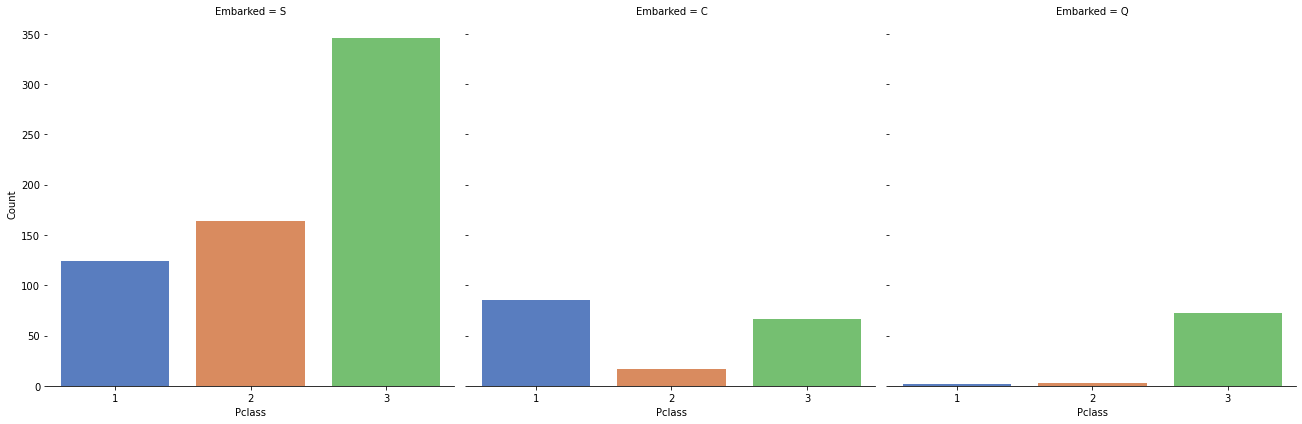

In [40]:
# 看一下Embarked和Pclass的关系
g = sns.factorplot("Pclass", col="Embarked",  data=train,
                   size=6, kind="count", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")

头等舱乘客存活率更好，可能原因是因为舱位与其社会地位与影响力的考量。

缺失值填充

Age

虽然年龄缺失值有256个，但age中某些年龄段与存活是较为高相关的，所以最好保留年龄特征，并将缺失值填充。

为了解决这个问题，可以对年龄相关的特征进行分析

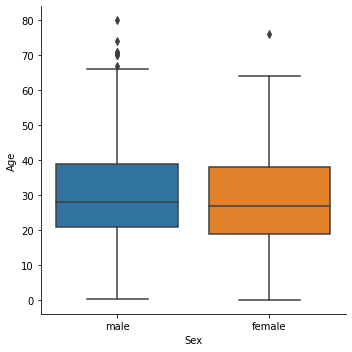

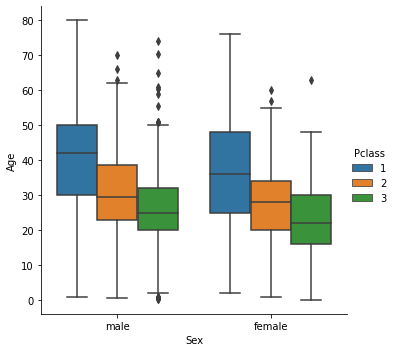

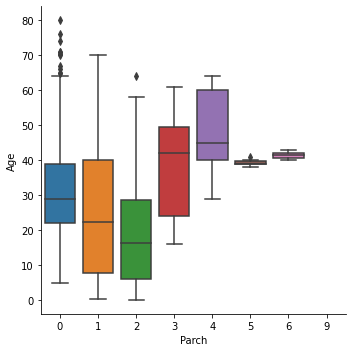

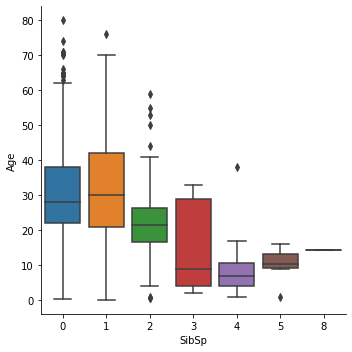

In [41]:
# 分析Age和Sex、Parch、Pclass和SibSp的关系
g = sns.factorplot(y="Age",x="Sex",data=dataset,kind="box")
g = sns.factorplot(y="Age",x="Sex",hue="Pclass", data=dataset,kind="box")
g = sns.factorplot(y="Age",x="Parch", data=dataset,kind="box")
g = sns.factorplot(y="Age",x="SibSp", data=dataset,kind="box")

Sex:男性与女性分布几乎一致，对于年龄值得预测并没有太大帮助

Pclass : Pclass与年龄的分布呈现负相关。Pclass=1的年龄年龄>Pclass=2的年龄>Pclass=3的年龄。

Parch : 乘客的父母/子女越多，年龄越大

SibSp : 乘客的姐妹/配偶越多，年龄越小


In [42]:
# convert Sex into categorical value 0 for male and 1 for female
dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1})

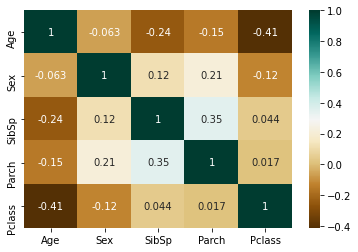

In [43]:
g = sns.heatmap(dataset[["Age","Sex","SibSp","Parch","Pclass"]].corr(),
                cmap="BrBG",annot=True)

Age与Sex无相关性。Age与Pclass、Parch、SibSp呈现负相关。

这里就使用Pclass和Parch及SibSp来填充年龄的缺失值。

In [44]:
# 获取age为NAN的索引值
index_NaN_age = list(dataset["Age"][dataset["Age"].isnull()].index)

In [45]:
# 获取到相似的年龄中位数
for i in index_NaN_age :
    age_med = dataset["Age"].median()
    age_pred = dataset["Age"][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) 
                               & (dataset['Parch'] == dataset.iloc[i]["Parch"]) 
                               & (dataset['Pclass'] == dataset.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        dataset['Age'].iloc[i] = age_pred
    else :
        dataset['Age'].iloc[i] = age_med

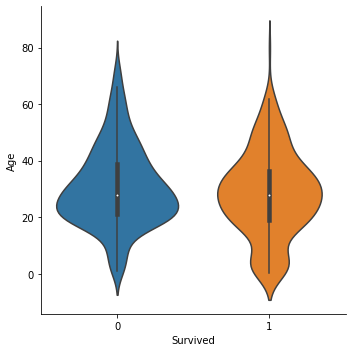

In [46]:
# g = sns.factorplot(x="Survived", y = "Age",data = train, kind="box")
g = sns.factorplot(x="Survived", y = "Age",data = train, kind="violin")


特征工程

Name/Title

In [47]:
dataset["Name"].head()


0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

姓名中有乘客的称呼

由于一些具有区分性的Title的乘客可能是疏散期间的首选，所以提取出来添加到模型中。


In [48]:
# Get Title from Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]
dataset["Title"] = pd.Series(dataset_title)
dataset["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

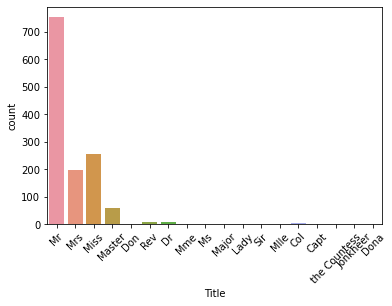

In [49]:
g = sns.countplot(x="Title",data=dataset)
g = plt.setp(g.get_xticklabels(), rotation=45) 

Mr:既可以用于已婚男性，也可以用于未婚男性

Mrs:已婚女士

Miss:称呼未婚女士，有时也用于自己不了解的年龄较大的妇女

Master:男童或男婴

Don:大学老师

Rev:牧师

Dr:医生或者博士

Mme:女士

Ms:既可以用于已婚女士也可以用于未婚女士

Major:陆军少校

Lady:公侯伯爵的女儿

Sir:上级长官

Mile:小姐

Col:上校（常用于陆空军）

Capt:船长

Countess:伯爵夫人

Jonkheer:乡绅

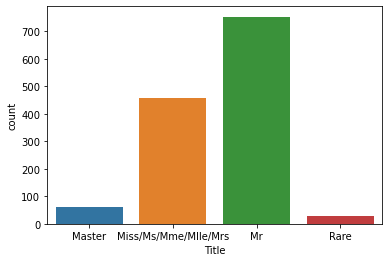

In [50]:
# 这里将有身份的归位一类
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess','Countess',
                                             'Capt', 'Col','Don', 'Dr', 
                                             'Major', 'Rev', 'Sir', 'Jonkheer',
                                             'Dona'], 'Rare')
dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, 
                                         "Ms" : 1 , "Mme":1, "Mlle":1, 
                                         "Mrs":1, "Mr":2, "Rare":3})
dataset["Title"] = dataset["Title"].astype(int)

g = sns.countplot(dataset["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])

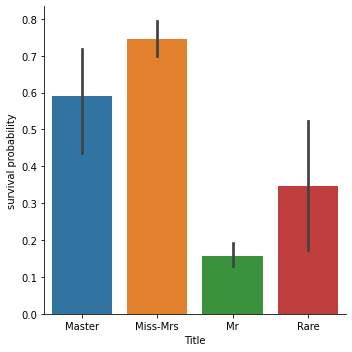

In [51]:
g = sns.factorplot(x="Title",y="Survived",data=dataset,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability")

从而可以明显看出：child和women first。


在Rare系列中，存活率较高，表明有尊称的人的社会地位更高把。

In [52]:
# 从Name字段中提取处有用信息后，就可以进行剔除操作了。
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

家庭大小

将SibSp、Parch、乘客自身作为家庭大小的表示

In [53]:
dataset["Fsize"] = dataset["SibSp"] + dataset["Parch"] + 1

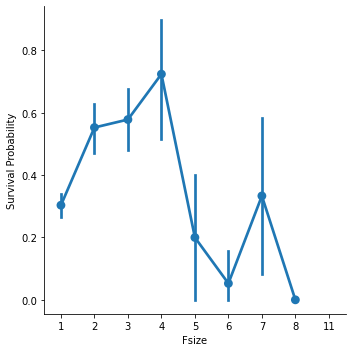

In [54]:
g = sns.factorplot(x="Fsize",y="Survived",data = dataset)
g = g.set_ylabels("Survival Probability")

从中可以看出，家庭大小与存活率是有关系的。

这里将家庭大小分为四类

In [55]:
dataset['Single'] = dataset['Fsize'].map(lambda s: 1 if s == 1 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s: 1 if  s == 2  else 0)
dataset['MedF'] = dataset['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s: 1 if s >= 5 else 0)

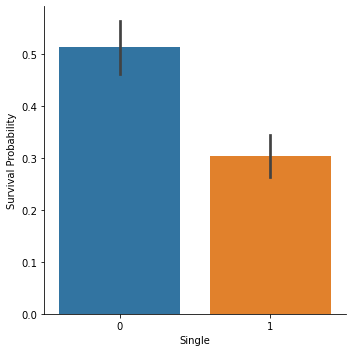

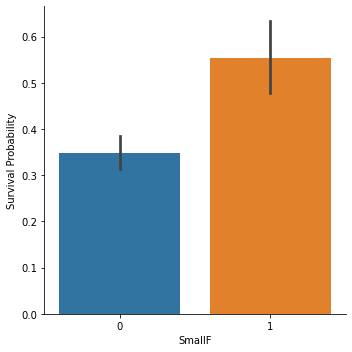

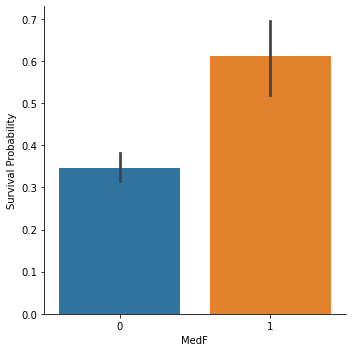

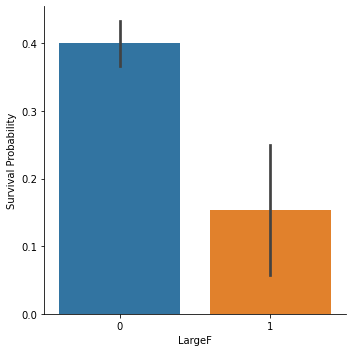

In [56]:
# 分别探究每一类与Survived的关系
g = sns.factorplot(x="Single",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="SmallF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="MedF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.factorplot(x="LargeF",y="Survived",data=dataset,kind="bar")
g = g.set_ylabels("Survival Probability")

图中表明，小家庭和中等家庭更有机会存活

In [57]:
dataset = pd.get_dummies(dataset, columns = ["Title"])
dataset = pd.get_dummies(dataset, columns = ["Embarked"], prefix="Em")

In [58]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,SmallF,MedF,LargeF,Title_0,Title_1,Title_2,Title_3,Em_C,Em_Q,Em_S
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,...,1,0,0,0,0,1,0,0,0,1
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,...,1,0,0,0,1,0,0,1,0,0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,...,0,0,0,0,1,0,0,0,0,1
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C123,...,1,0,0,0,1,0,0,0,0,1
4,5,0.0,3,0,35.0,0,0,373450,2.085672,NaN,...,0,0,0,0,0,1,0,0,0,1


Cabin

In [59]:
dataset["Cabin"].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [60]:
dataset["Cabin"].describe()

count                 292
unique                186
top       B57 B59 B63 B66
freq                    5
Name: Cabin, dtype: object

In [61]:
dataset["Cabin"].isnull().sum()

1007

Cabin缺失值有1007个。

假设没有客舱的乘客显示的是缺失的值，而不是客舱号。

In [62]:
dataset["Cabin"][dataset["Cabin"].notnull()].head()


1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [63]:
# 缺失值用X替代率

dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

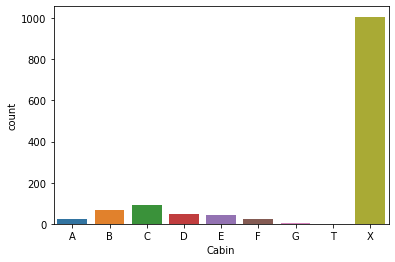

In [64]:
g = sns.countplot(dataset["Cabin"],order=['A','B','C','D','E','F','G','T','X'])

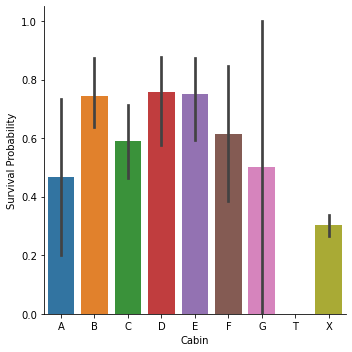

In [65]:
g = sns.factorplot(y="Survived",x="Cabin",
                   data=dataset,kind="bar",
                   order=['A','B','C','D','E','F','G','T','X'])
g = g.set_ylabels("Survival Probability")

由于有客舱的乘客数量较少，生存概率有一个重要的标准差，我们无法区分不同座位乘客的生存概率。

但可以看到，有cabin值的存活率比没有cabin的高。尤其是BCDEF。

In [66]:
dataset = pd.get_dummies(dataset, columns = ["Cabin"],prefix="Cabin")

Ticket

In [68]:
dataset["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

ticket号应该是与cabin号相关的，而数值是cabin中对应的实际位置。

既然ticket前缀与cabin号有关，那么应该也与Survived有关。


In [69]:
## 提取处ticket的前缀，而没有前缀的则用X填充。

Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
dataset["Ticket"] = Ticket
dataset["Ticket"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [70]:
dataset = pd.get_dummies(dataset, columns = ["Ticket"], prefix="T")

In [71]:
# 改变Pclass类型为category
dataset["Pclass"] = dataset["Pclass"].astype("category")
dataset = pd.get_dummies(dataset, columns = ["Pclass"],prefix="Pc")

In [73]:
dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [74]:
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Fsize,Single,SmallF,MedF,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,0.0,0,22.0,1,0,1.981001,2,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,38.0,1,0,4.266662,2,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,1,26.0,0,0,2.070022,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1.0,1,35.0,1,0,3.972177,2,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,0.0,0,35.0,0,0,2.085672,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


模型

In [76]:
## 拆分数据集

train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels=["Survived"],axis = 1,inplace=True)

In [77]:
## 拆分训练集特征和label

train["Survived"] = train["Survived"].astype(int)

Y_train = train["Survived"]

X_train = train.drop(labels = ["Survived"],axis = 1)

6.1 simple modeling 

SVC

Decision Tree

AdaBoost

Random Forest

Extra Trees

Gradient Boosting

Multiple layer perceprton (neural network)

KNN

Logistic regression

Linear Discriminant Analysis

In [80]:
from sklearn.model_selection import GridSearchCV,cross_val_score, StratifiedKFold, learning_curve
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

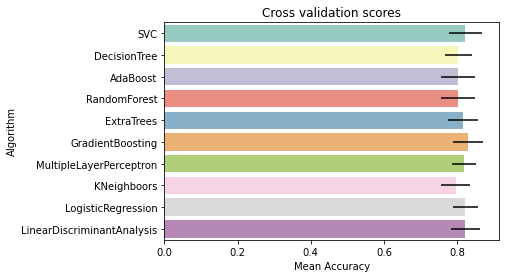

In [82]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),
                                      random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, 
                                      scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                       "Algorithm":["SVC","DecisionTree","AdaBoost","RandomForest",
                                    "ExtraTrees","GradientBoosting","MultipleLayerPerceptron",
                                    "KNeighboors","LogisticRegression",
                                    "LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, 
                palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

超参数调优

对AdaBoost、ExtraTrees、RandomForest、GradientBoosting和SVC分类器进行网格搜索优化。

In [83]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid,
                        cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    2.1s finished


In [84]:
gsadaDTC.best_score_

0.8206583427922814

In [85]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, 
                      scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_


Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   14.6s
[Parallel(n_jobs=4)]: Done 533 out of 540 | elapsed:   21.5s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   21.8s finished


0.8297389330306469

In [86]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid,
                     cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   15.7s
[Parallel(n_jobs=4)]: Done 533 out of 540 | elapsed:   23.8s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   24.2s finished


0.8388195232690124

In [87]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, 
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   15.9s finished


0.8365493757094211

In [88]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, 
                      scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   10.6s
[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   17.7s finished


0.8331441543700341

学习曲线图

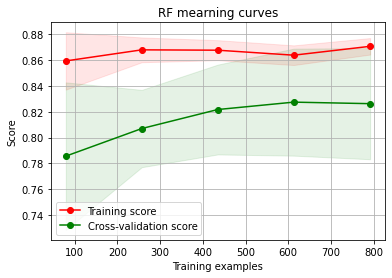

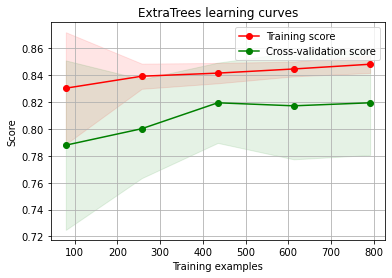

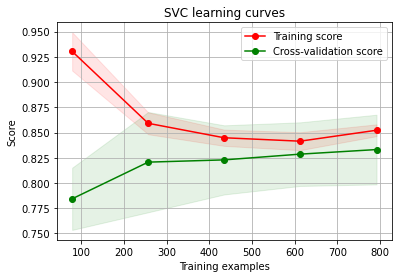

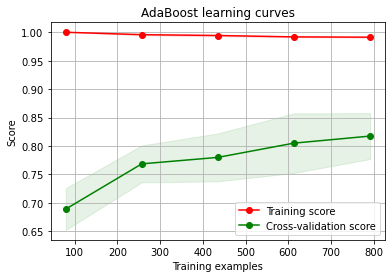

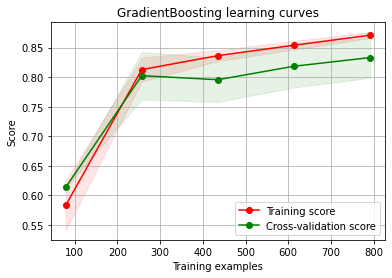

In [89]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

GradientBoosting和Adaboost分类器对训练集过度拟合。根据不断增长的交叉验证曲线，GradientBoosting和Adaboost可以通过更多的训练实例表现得更好。

SVC和ExtraTrees分类器似乎更好地推广了预测，因为训练曲线和交叉验证曲线非常接近。

基于树的分类器的特征重要性


为了能够看到最有用的特征来预测乘客的生存，我展示了4个基于树的分类器的特征重要性。

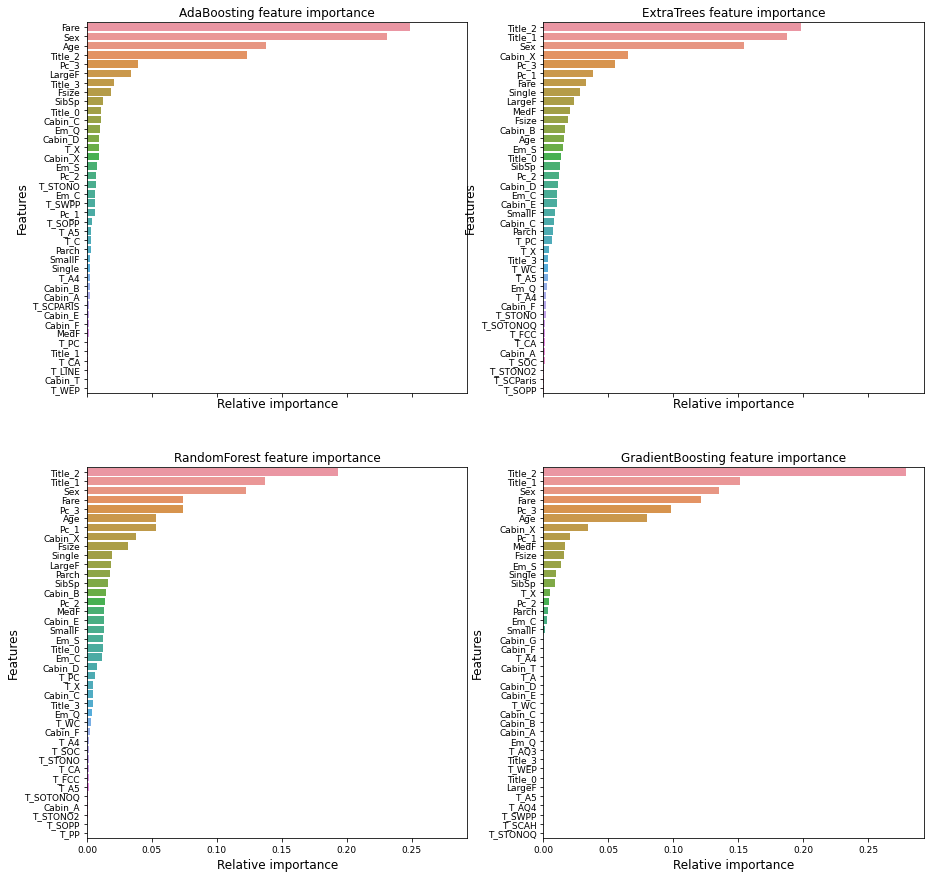

In [90]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),
                     ("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],
                        x = classifier.feature_importances_[indices][:40] , 
                        orient='h',
                        ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

四个分类器根据相对重要性有不同的顶部特征。这意味着他们的预测不是基于相同的特征。但重要性高的特征还是相同的，例如“Fare”、“Title_2”、“Age”和“Sex”。


Title_2表明Mrs/Mlle/Mme/Miss/Ms类别与Sex高度相关。


根据这4个分类器的特征重要性，相对于船的位置，Survived预测似乎与乘客的Age、Sex、Family Size和social standing(社会地位)的关系更大。


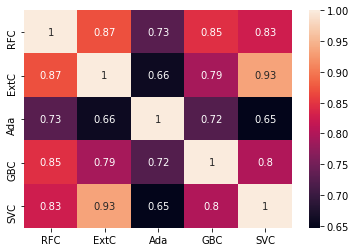

In [91]:
test_Survived_RFC = pd.Series(RFC_best.predict(test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(test), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(test), name="GBC")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,
                              test_Survived_ExtC,
                              test_Survived_AdaC,
                              test_Survived_GBC, 
                              test_Survived_SVMC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

除了Adaboost与其他分类器相比之外，这5个分类器的预测似乎非常相似。


5个分类器的预测结果基本相同，但也存在一定的差异(希望把)，就用投票器进行组合吧。

Ensemble modeling

模型组合

使用投票器进行预测

In [93]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

预测

In [94]:
test_Survived = pd.Series(votingC.predict(test), name="Survived")

results = pd.concat([IDtest,test_Survived],axis=1)

results.to_csv("submission.csv",index=False)